# Visualizing the Gender Gap in College Degrees

In this project, we visualize the gender gap across college degrees in United States. The [Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

### Data Description

The dataset has the following features:

* `Year` - Graduation year
* `Agriculture` - `Social Sciences and History` - bachelor's degrees granted to women for a specific year. The values contained represent the percentage of bachelor's degrees granted to women from 1970 to 2012.

__Disclaimer__

The project has been developed as part of the Dataquest guided projects work. Majority of the code and all of the analysis belongs to me.

## Data Preparation

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255) # rgb values for dark blue
cb_orange = (255/255, 128/255, 14/255) # rgb values for orange

# list of STEM degrees
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

## Data Visualization

The dataset is quite simple. We have percentage of women graduating from a bachelor degree for a specific year. In our case a line chart will serve well to illustrate the percentage of men vs women graduating across years for various STEM fields.

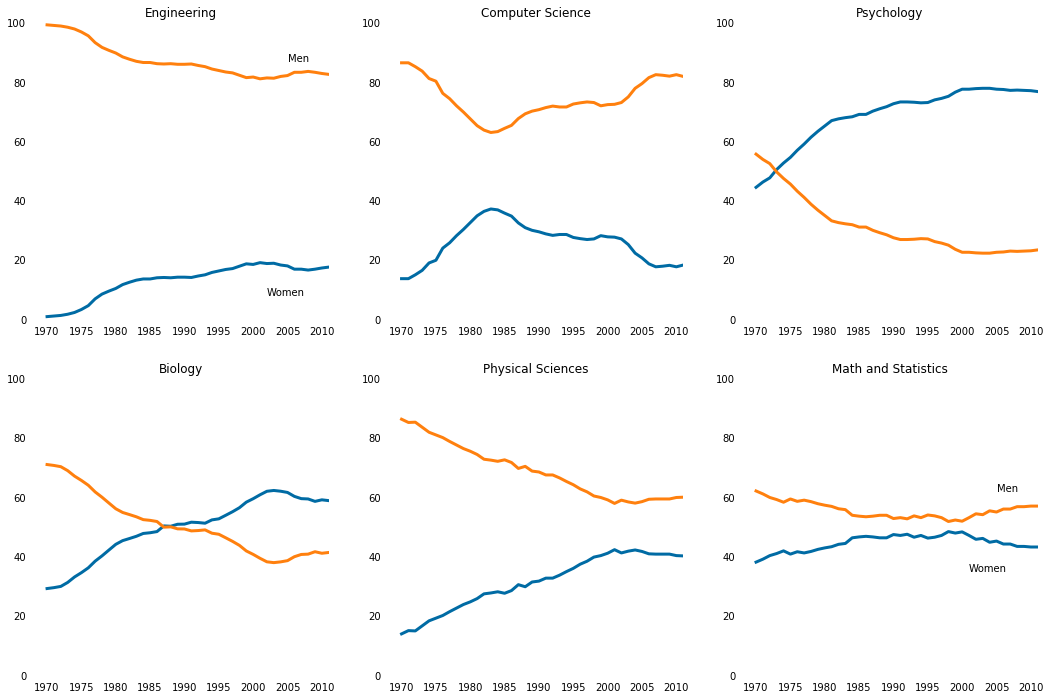

In [2]:
fig = plt.figure(figsize=(18, 12))

for sp in range(len(stem_cats)):
    ax = fig.add_subplot(2,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

The above line charts beautifully show us the progress of successful participation of women in the STEM fields. The above plots are ordered by decreasing gender gap.

But, I don't want to look at the STEM degrees only. I would like to be able to see all of the degrees in one diagram with each column representing the categories. For this we first define the categories:

* Liberal Arts
* Other

Then, I will plot them in each column on a large diagram with total of 17 categories (STEM-6, Liberal Arts-5, Other-6).

I will also perform the following tweaks to the visual in order to improve data-to-ink ratio and interpretability:

* *Remove all ticks except the ones on the bottom graphs.*
* *On the y-axis (percentages) only keep 0 and 100*
* *Add a horizontal line at 50% to help understand the gap relatively*

Finally, I will export the figure above into a png file for use in a presentation or online materials.

In [3]:
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 
              'Agriculture','Business', 'Architecture']

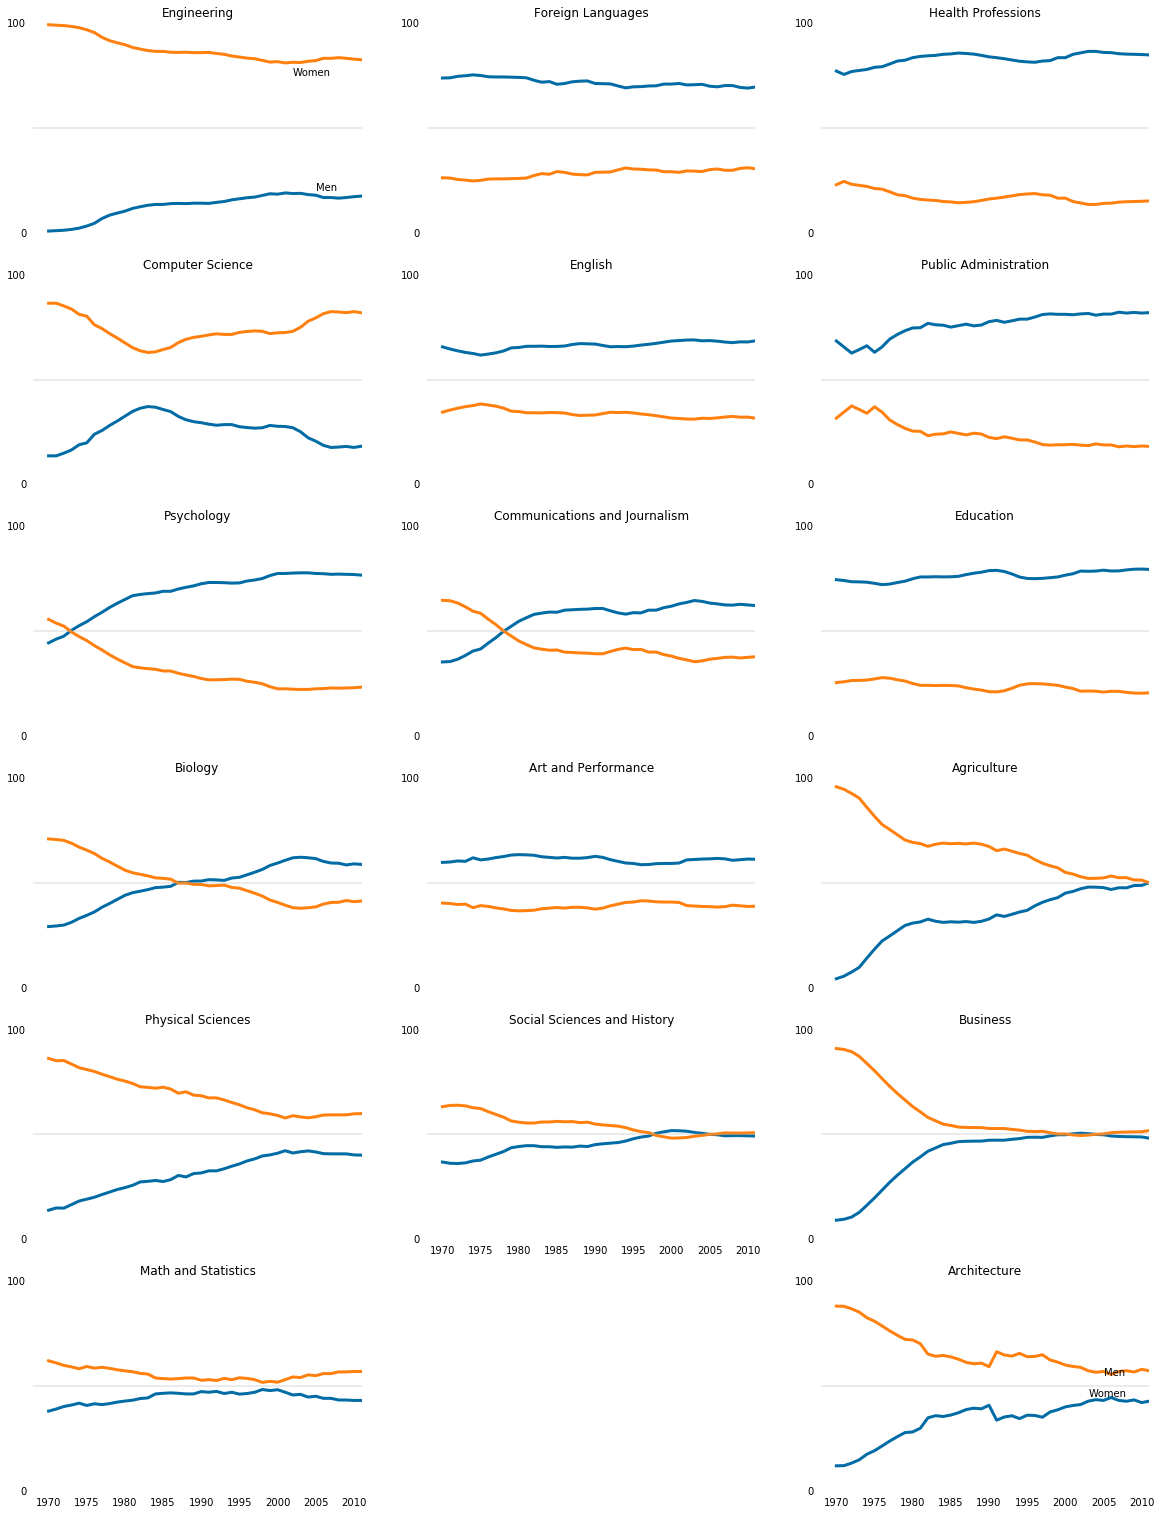

In [4]:
fig = plt.figure(figsize=(20, 27))

for sp in range(len(stem_cats)):
    ax = fig.add_subplot(6,3, 3*sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 0:
        ax.text(2005, 20, 'Men')
        ax.text(2002, 75, 'Women')
    if sp == len(stem_cats) - 1:
        ax.tick_params(labelbottom=True)
        
for sp in range(len(lib_arts_cats)):
    ax = fig.add_subplot(6,3, 3*sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == len(lib_arts_cats) - 1:
        ax.tick_params(labelbottom=True)
        
for sp in range(len(other_cats)):
    ax = fig.add_subplot(6,3, 3*sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp == 5:
        ax.tick_params(labelbottom=True)
        ax.text(2005, 55, 'Men')
        ax.text(2003, 45, 'Women')

plt.savefig('gender_degrees.png')
plt.show()

The above graphs are very useful in interpreting and understanding the gender gap in bachelor's degrres across years in United States. We can clearly observe that while for some fields such as Engineering, Health Professionals and Foreign Languages the gender gap is still significant, for fields such as Physical Sciences, Business, Agriculture the gap has been narrowing year on year.

